In [17]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt 
from keras.applications.resnet import ResNet50
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np



In [19]:
train_path  = './JOELINHO 1/train'
valid_path  = './JOELINHO 1/val'
test_path   = './JOELINHO 1/test'

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet  import preprocess_input, ResNet50
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras
batch_size = 34
time=0


In [21]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input, 
                                    zoom_range= 0.2, 
                                    horizontal_flip= True, 
                                    shear_range= 0.2,
                                    )

train = train_data_gen.flow_from_directory(directory= train_path, 
                                           target_size=(224,224))



Found 5778 images belonging to 5 classes.


In [22]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                         zoom_range= 0.2, 
                                        horizontal_flip= True, 
                                        shear_range= 0.2          
 )

valid = validation_data_gen.flow_from_directory(directory= valid_path, target_size=(224,224))

Found 826 images belonging to 5 classes.


In [23]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), 
                                          shuffle= False)

Found 1656 images belonging to 5 classes.


In [24]:
# Covid +ve X-Ray is represented by 0 and Normal is represented by 1

class_type = {0:'Com artrose',  1 : 'Possible artrosis',2:'Definitive artrosis',3:'multiple artrosis',4:'serevere artrosis'}

In [ ]:
#model = tf.keras.models.Sequential([
 #   rescaling,
  #  data_augmentation,
   # model_transfer_learning,
    #tf.keras.layers.GlobalAveragePooling2D(),
    #tf.keras.layers.AveragePooling2D()
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(1, activation = 'sigmoid')
#])

#model.compile(
 #   optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
  #  loss = tf.keras.losses.BinaryCrossentropy(),
   # metrics = ['accuracy']
#)

#model.summary()

In [ ]:
#history = model.fit(
 #   dataset_train,
  #  validation_data = dataset_validation,
   # epochs = epochs,
    #callbacks = [
     #   early_stopping
    #]
#)

In [25]:
from keras.applications.resnet import ResNet50
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [26]:
res = ResNet50( input_shape=(224,224,3), include_top= False) # considerando novos pesos

In [27]:
#for layer in res.layers:           #
 # layer.trainable = False

 - Em vez de uma sigmoid eu passei uma softmax para retornar o vetor com K cvalores reais 
 - E temos agora 5 neurônios

In [28]:
x = Flatten()(res.output)
x = Dense(units=5 , activation='softmax', name = 'predictions' )(x)

# Criando o modelo com as novas camadas
model = Model(res.input, x)

In [29]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [30]:
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [31]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import time

#Para se depois de 3 épocas a rede neural não melhora
es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
#salva o melhor modelo possívwel baseado na melhora da accuaracy
mc = ModelCheckpoint(filepath="bestmodel_categorial.h5", monitor="val_accuracy", verbose=1, save_best_only= True)


In [32]:
import time
from reader import feed
tic = time.perf_counter()

hist = model.fit_generator(train, steps_per_epoch= 45, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])

toc = time.perf_counter()

time = toc - tic




file = open('time_categorial', 'w')
file.write('%.2f' % time)
file.close()


C:\Users\yagok\AppData\Local\Temp\ipykernel_24072\1755716163.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 45, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])


Epoch 1/30
45/45 [==============================] - ETA: 0s - loss: 5.4488 - accuracy: 0.3701
Epoch 1: val_accuracy improved from -inf to 0.12109, saving model to bestmodel_categorial.h5
45/45 [==============================] - 314s 7s/step - loss: 5.4488 - accuracy: 0.3701 - val_loss: 131410056.0000 - val_accuracy: 0.1211
Epoch 2/30
25/45 [===============>..............] - ETA: 2:07 - loss: 2.6203 - accuracy: 0.3725

In [32]:
## load only the best model 
from keras.models import load_model
model = load_model("bestmodel_categorial.h5")

# Vendo a performance do modelo

In [153]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

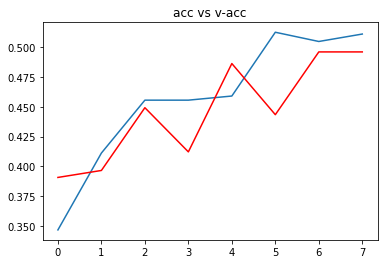

In [154]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

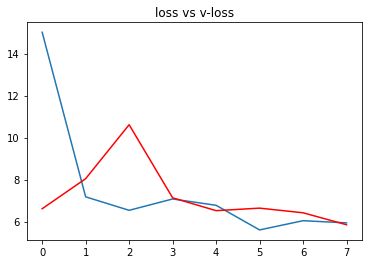

In [155]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

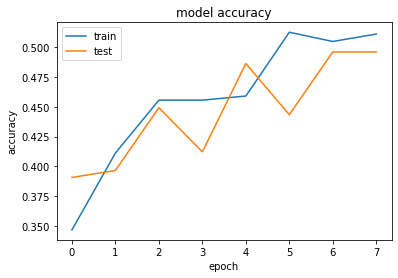

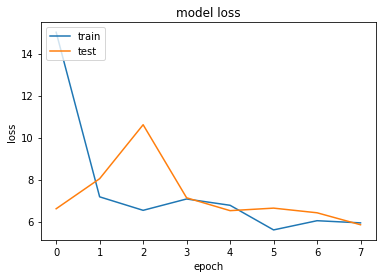

In [156]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# checking out the accurscy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

C:\Users\yagok\AppData\Local\Temp\ipykernel_24072\1957840212.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(generator= test)[1]


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

In [13]:
#função que tsea o modelo
def testa_modelo(path):
    path = path       # you can add any image path

    #predictions: path:- provide any image from google or provide image from all image folder
    img = get_img_array(path)

    res = class_type[np.argmax(model.predict(img))]
    print(f"The given X-Ray image is of type = {res}")
    print()



    # to display the image  
    plt.imshow(img[0]/255, cmap = "gray")
    plt.title("input image")
    plt.show()


1/1 [==============================] - 0s 92ms/step
The given X-Ray image is of type = serevere artrosis



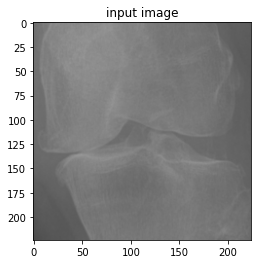

In [28]:
testa_modelo('JOELINHO 2/test/4/9964731L.png')

In [18]:
classes_name = ('0','1','2','3','4')
height, width = (224, 224)
val_pre_dataset = train_data_gen .flow_from_directory(valid_path, target_size = (height, width), 
                classes = classes_name, batch_size = batch_size, shuffle = False)

test_set = val_pre_dataset
test_set.reset()
predictions = model.predict(val_pre_dataset)
y_pred = np.argmax(predictions, axis=-1)

y_test = val_pre_dataset.labels
cm = confusion_matrix(y_test,y_pred)
cm2 = classification_report(val_pre_dataset.classes, y_pred)

print(cm)
print(classification_report(val_pre_dataset.classes, y_pred))


file = open('time_categorial_metrics.txt', 'w')
file.write('tempo %s' % cm2)
file.close()

Found 826 images belonging to 5 classes.
25/25 [==============================] - 33s 1s/step
[[163   4 118   2  41]
 [ 84   3  53   0  13]
 [108   4  68   0  32]
 [ 60   1  29   1  15]
 [ 19   0   6   0   2]]
              precision    recall  f1-score   support

           0       0.38      0.50      0.43       328
           1       0.25      0.02      0.04       153
           2       0.25      0.32      0.28       212
           3       0.33      0.01      0.02       106
           4       0.02      0.07      0.03        27

    accuracy                           0.29       826
   macro avg       0.25      0.18      0.16       826
weighted avg       0.30      0.29      0.25       826

